In [1]:
import numpy as np #lib para cálculos e funções em arrays multidimensionais
import pandas as pd #pandas - libpra manipulação e análise de dados de alta performance
import seaborn as sb #lib pra dar um upgrade na visualização do matplotlib
import matplotlib #lib para plotar gráficos
import matplotlib.pyplot as plt
sb.set_style('darkgrid') #definindo tema do seaborn (fundo mais escuro com grelhas)

font = {'family' : 'Arial', #definindo objeto para formatar a fonte
        'size'   : 16}

matplotlib.rc('font', **font) #aplicando a fonte padrão que queremos para o plot dos gráficos

## 1 - Carregando os Datasets pré-tratados ##

In [2]:
#Carregando o dataset de óbitos por raça por semana
cor_se_norm = pd.read_csv('cor-semana-covid-tratado.csv', sep=',')

#Removendo a coluna de índice
cor_se_norm = cor_se_norm.iloc[: , 1:]

#Exibindo o dataset
print('\nTabela Pré-Tratada - Óbitos por covid / Raça / Semana Epidemiológica')
display(cor_se_norm)


Tabela Pré-Tratada - Óbitos por covid / Raça / Semana Epidemiológica


,Cor,SE_20 11_1ºÓbito Covid19,SE_20 12,SE_20 13,SE_20 14,SE_20 15,SE_20 16,SE_20 17,SE_20 18,SE_20 19,...,SE_20 39,SE_20 40,SE_20 41,SE_20 42,SE_20 43,SE_20 44,SE_20 45,SE_20 46,SE_20 47,Total
0,Branca,3.0,48.0,178,366.0,445,452.0,519,656.0,620,...,165,174.0,128.0,101.0,89.0,79.0,92,124.0,51.0,12745
1,Preta,0.0,2.0,15,56.0,66,56.0,82,104.0,87,...,27,22.0,20.0,18.0,15.0,7.0,13,13.0,4.0,1903
2,Amarela,0.0,2.0,10,16.0,18,21.0,31,24.0,30,...,5,5.0,4.0,7.0,4.0,3.0,2,5.0,3.0,471
3,Parda,0.0,5.0,37,128.0,178,189.0,215,291.0,303,...,55,54.0,53.0,45.0,30.0,27.0,28,36.0,18.0,4927
4,Indígena,0.0,0.0,1,0.0,2,0.0,1,0.0,2,...,1,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,14
5,Não informado,0.0,0.0,12,17.0,25,28.0,22,42.0,41,...,8,11.0,5.0,7.0,6.0,4.0,2,3.0,1.0,689
6,Total,3.0,57.0,253,583.0,734,746.0,870,1117.0,1083,...,261,266.0,210.0,178.0,144.0,120.0,138,181.0,77.0,20749


In [3]:
#Carregando o dataset de população por idade por raça
pop_norm = pd.read_csv('cor-idade-2010-tratada.csv', sep=',')

#Removendo a coluna de índice
pop_norm = pop_norm.iloc[: , 1:]

#Exibindo o dataset
print('\nTabela Pré-Tratada - População / Cor / Idade')
display(pop_norm)


Tabela Pré-Tratada - População / Cor / Idade


,Cor,0 a 4,5 a 9,10 a 14,15 a 19,20 a 24,25 a 29,30 a 34,35 a 39,40 a 44,45 a 49,50 a 54,55 a 59,60 a 64,65 a 69,70 a 74,75 e mais,Ignorada,Total
0,Branca,444168,433860,466843,462715,570950,636194,599762,524122,485640,465774,425601,358120,283006,208206,169901,128717,161089.0,6824668
1,Preta,29954,39476,52706,56272,68610,75869,73139,64755,59093,51910,47914,37809,27559,18537,13717,9097,9666.0,736083
2,Amarela,8329,9020,10726,12276,17282,21097,20445,18141,17467,17002,17422,17874,17175,13987,11468,7516,9017.0,246244
3,Parda,227650,275068,336289,309997,333423,339887,315436,280563,249819,207196,175970,133704,94896,61310,41992,25485,24533.0,3433218
4,Indígena,813,840,843,982,1352,1484,1256,1072,939,823,734,590,413,293,221,152,170.0,12977
5,Ignorado,13,15,23,15,42,52,38,31,21,15,17,16,6,5,2,2,0.0,313
6,Total,710927,758279,867430,842257,991659,1074583,1010076,888684,812979,742720,667658,548113,423055,302338,237301,170969,204475.0,11253503


## 2 - Tratamento dos dados - Segundo Ciclo ##

In [4]:
#removendo a primeira e última coluna (cor e total) - pois lá na frente eu preciso só dos números pra fazer a soma cumulativa
cor_se_soma = cor_se_norm.loc[:, cor_se_norm.columns[1:-1]]

print('\nÓbitos confirmados de COVID - Raça / Semana Epidemiológica')
display(cor_se_soma)




Óbitos confirmados de COVID - Raça / Semana Epidemiológica


,SE_20 11_1ºÓbito Covid19,SE_20 12,SE_20 13,SE_20 14,SE_20 15,SE_20 16,SE_20 17,SE_20 18,SE_20 19,SE_20 20,...,SE_20 38,SE_20 39,SE_20 40,SE_20 41,SE_20 42,SE_20 43,SE_20 44,SE_20 45,SE_20 46,SE_20 47
0,3.0,48.0,178,366.0,445,452.0,519,656.0,620,688,...,209.0,165,174.0,128.0,101.0,89.0,79.0,92,124.0,51.0
1,0.0,2.0,15,56.0,66,56.0,82,104.0,87,122,...,36.0,27,22.0,20.0,18.0,15.0,7.0,13,13.0,4.0
2,0.0,2.0,10,16.0,18,21.0,31,24.0,30,18,...,7.0,5,5.0,4.0,7.0,4.0,3.0,2,5.0,3.0
3,0.0,5.0,37,128.0,178,189.0,215,291.0,303,299,...,66.0,55,54.0,53.0,45.0,30.0,27.0,28,36.0,18.0
4,0.0,0.0,1,0.0,2,0.0,1,0.0,2,1,...,0.0,1,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0
5,0.0,0.0,12,17.0,25,28.0,22,42.0,41,40,...,9.0,8,11.0,5.0,7.0,6.0,4.0,2,3.0,1.0
6,3.0,57.0,253,583.0,734,746.0,870,1117.0,1083,1168,...,327.0,261,266.0,210.0,178.0,144.0,120.0,138,181.0,77.0


In [5]:
cor_se_soma = cor_se_soma.cumsum(axis=1)

print('\nÓbitos confirmados de COVID - Raça / Semana Epidemiológica - Soma Cumulativa')
display(cor_se_soma)


Óbitos confirmados de COVID - Raça / Semana Epidemiológica - Soma Cumulativa


,SE_20 11_1ºÓbito Covid19,SE_20 12,SE_20 13,SE_20 14,SE_20 15,SE_20 16,SE_20 17,SE_20 18,SE_20 19,SE_20 20,...,SE_20 38,SE_20 39,SE_20 40,SE_20 41,SE_20 42,SE_20 43,SE_20 44,SE_20 45,SE_20 46,SE_20 47
0,3.0,51.0,229.0,595.0,1040.0,1492.0,2011.0,2667.0,3287.0,3975.0,...,11742.0,11907.0,12081.0,12209.0,12310.0,12399.0,12478.0,12570.0,12694.0,12745.0
1,0.0,2.0,17.0,73.0,139.0,195.0,277.0,381.0,468.0,590.0,...,1764.0,1791.0,1813.0,1833.0,1851.0,1866.0,1873.0,1886.0,1899.0,1903.0
2,0.0,2.0,12.0,28.0,46.0,67.0,98.0,122.0,152.0,170.0,...,433.0,438.0,443.0,447.0,454.0,458.0,461.0,463.0,468.0,471.0
3,0.0,5.0,42.0,170.0,348.0,537.0,752.0,1043.0,1346.0,1645.0,...,4581.0,4636.0,4690.0,4743.0,4788.0,4818.0,4845.0,4873.0,4909.0,4927.0
4,0.0,0.0,1.0,1.0,3.0,3.0,4.0,4.0,6.0,7.0,...,12.0,13.0,13.0,13.0,13.0,13.0,13.0,14.0,14.0,14.0
5,0.0,0.0,12.0,29.0,54.0,82.0,104.0,146.0,187.0,227.0,...,642.0,650.0,661.0,666.0,673.0,679.0,683.0,685.0,688.0,689.0
6,3.0,60.0,313.0,896.0,1630.0,2376.0,3246.0,4363.0,5446.0,6614.0,...,19174.0,19435.0,19701.0,19911.0,20089.0,20233.0,20353.0,20491.0,20672.0,20749.0


## 3 - Feature Engineering + Mesclando os dados entre os datasets ##

In [9]:
#adicionando novamente a coluna com o label das cores
cor_se_soma['Cor'] = cor_se_norm['Cor']

#adicionando a coluna Habitantes que vem do outro dataset (populacao - coluna Total)
cor_se_soma['Habitantes'] = pop_norm.loc[:,'Total']

#eliminando as linhas 5 e 6 - Não informado / Total
cor_se_soma = cor_se_soma.drop([5, 6]) 

print('\nÓbitos confirmados de COVID - Raça / Semana Epidemiológica')
display(cor_se_soma)


Óbitos confirmados de COVID - Raça / Semana Epidemiológica


,SE_20 11_1ºÓbito Covid19,SE_20 12,SE_20 13,SE_20 14,SE_20 15,SE_20 16,SE_20 17,SE_20 18,SE_20 19,SE_20 20,...,SE_20 40,SE_20 41,SE_20 42,SE_20 43,SE_20 44,SE_20 45,SE_20 46,SE_20 47,Cor,Habitantes
0,3.0,51.0,229.0,595.0,1040.0,1492.0,2011.0,2667.0,3287.0,3975.0,...,12081.0,12209.0,12310.0,12399.0,12478.0,12570.0,12694.0,12745.0,Branca,6824668
1,0.0,2.0,17.0,73.0,139.0,195.0,277.0,381.0,468.0,590.0,...,1813.0,1833.0,1851.0,1866.0,1873.0,1886.0,1899.0,1903.0,Preta,736083
2,0.0,2.0,12.0,28.0,46.0,67.0,98.0,122.0,152.0,170.0,...,443.0,447.0,454.0,458.0,461.0,463.0,468.0,471.0,Amarela,246244
3,0.0,5.0,42.0,170.0,348.0,537.0,752.0,1043.0,1346.0,1645.0,...,4690.0,4743.0,4788.0,4818.0,4845.0,4873.0,4909.0,4927.0,Parda,3433218
4,0.0,0.0,1.0,1.0,3.0,3.0,4.0,4.0,6.0,7.0,...,13.0,13.0,13.0,13.0,13.0,14.0,14.0,14.0,Indígena,12977


In [10]:
#Transformando as colunas 'SEMANAS' E 'ÓBITOS' em linhas
cor_se_melt = cor_se_soma.melt(id_vars=['Cor', 'Habitantes'], value_vars = cor_se_norm.columns[1:-2],var_name='Semana', value_name='Óbitos')

print('\nÓbitos confirmados de COVID - Raça / Semana Epidemiológica')
display(cor_se_melt.tail())


Óbitos confirmados de COVID - Raça / Semana Epidemiológica


,Cor,Habitantes,Semana,Óbitos
175,Branca,6824668,SE_20 46,12694.0
176,Preta,736083,SE_20 46,1899.0
177,Amarela,246244,SE_20 46,468.0
178,Parda,3433218,SE_20 46,4909.0
179,Indígena,12977,SE_20 46,14.0


In [11]:
#adicionando nova coluna (óbitos por 100.000 hab)
cor_se_melt['Óbitos por 100 mil'] = (100000 * cor_se_melt['Óbitos']) / cor_se_melt['Habitantes']

print('\nÓbitos confirmados de COVID - Raça / Semana Epidemiológica')
display(cor_se_melt.tail())


Óbitos confirmados de COVID - Raça / Semana Epidemiológica


,Cor,Habitantes,Semana,Óbitos,Óbitos por 100 mil
175,Branca,6824668,SE_20 46,12694.0,186.001722
176,Preta,736083,SE_20 46,1899.0,257.987211
177,Amarela,246244,SE_20 46,468.0,190.055392
178,Parda,3433218,SE_20 46,4909.0,142.985386
179,Indígena,12977,SE_20 46,14.0,107.883178


## 4 - Plotando o primeiro gráfico para análise de tendência ##

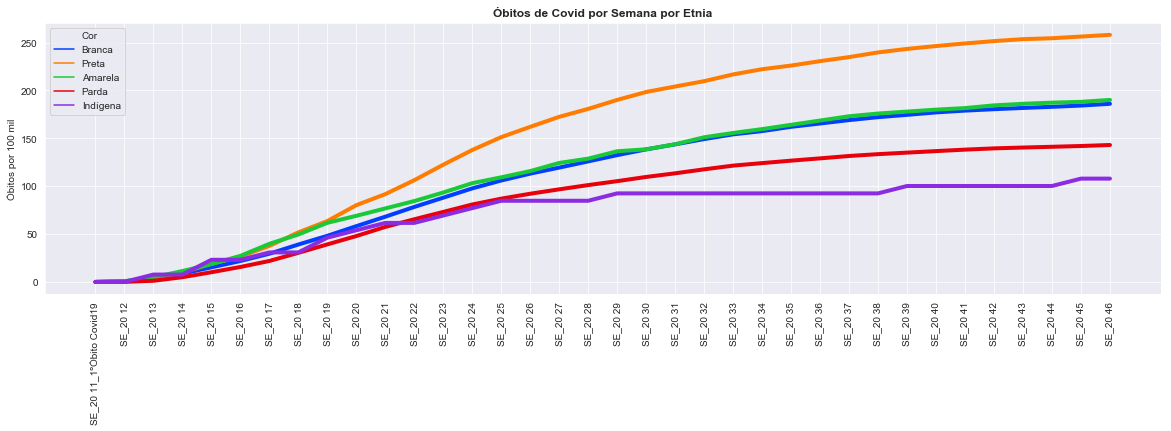

In [17]:
fig, axs = plt.subplots(figsize=(20, 5))
sb.lineplot(data=cor_se_melt, x='Semana', y='Óbitos por 100 mil', hue='Cor', palette='bright', lw=4)
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('')
plt.title('Óbitos de Covid por Semana por Etnia',fontweight="bold")
plt.show()

## 5 - Exportando os Resultados Preliminares ##

In [18]:
cor_se_melt.to_csv('mortalidade-cor-semana-tratado.csv')